In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
dataset_path = '/content/drive/My Drive/srgan_dataset'

In [3]:
from glob import glob
import tensorflow as tf
import numpy as np

def load_images(image_path, target_size):
    images = []
    for img_path in glob(os.path.join(image_path, '*')):
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)
    return np.array(images)

lr_images_path = os.path.join(dataset_path, 'DIV2K_train_HR/DIV2K_train_HR')
hr_images_path = os.path.join(dataset_path, 'DIV2K_train_LR')

lr_images = load_images(lr_images_path, target_size=(64, 64))
hr_images = load_images(hr_images_path, target_size=(256, 256))

print(f"Loaded {len(lr_images)} LR images and {len(hr_images)} HR images")


Loaded 178 LR images and 800 HR images


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


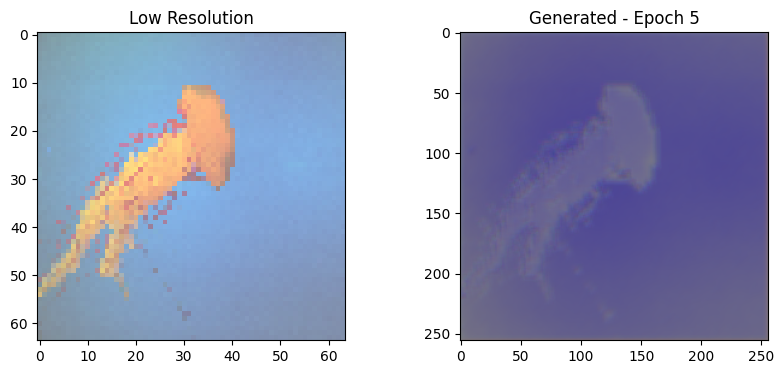

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


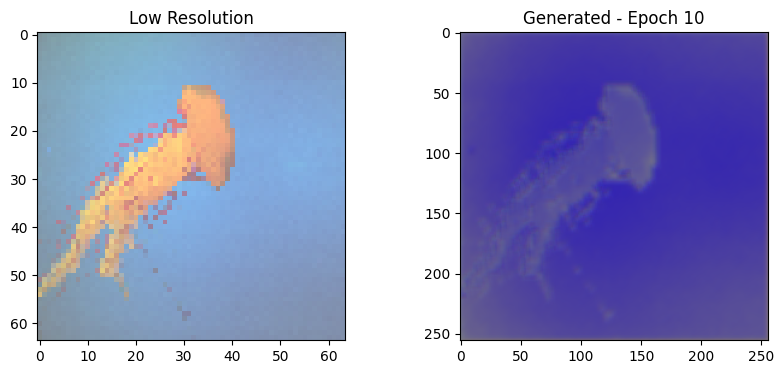

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


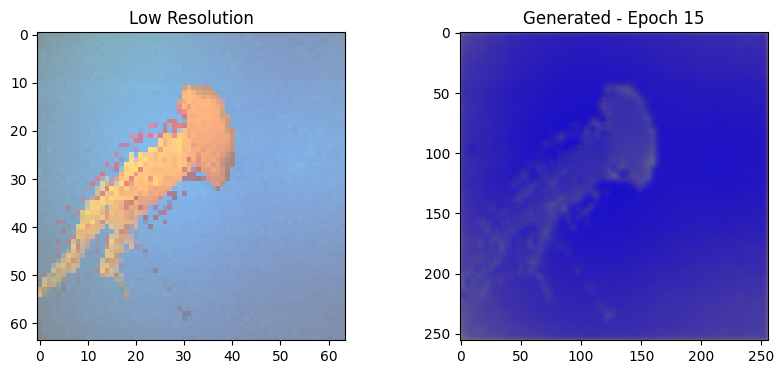

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


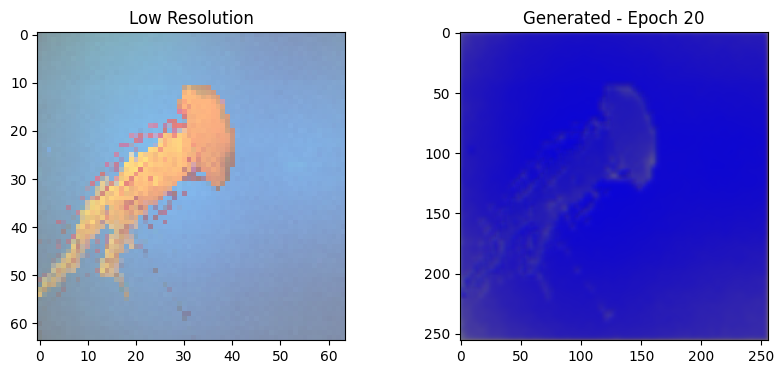

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


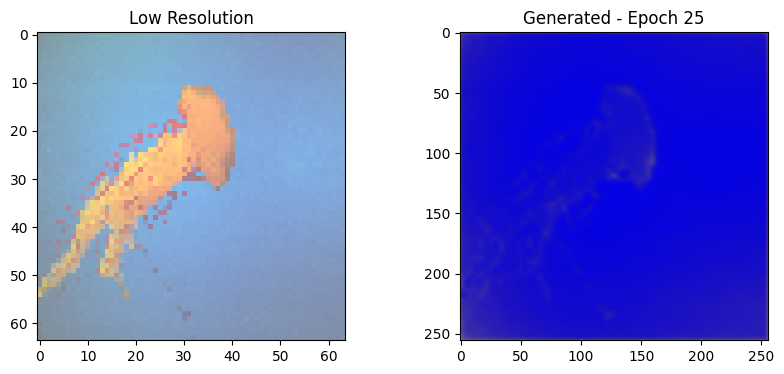

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


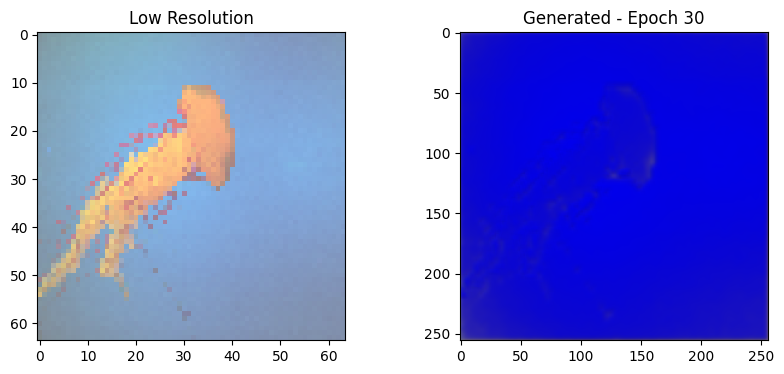

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Dense, Flatten, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

# Generator
def build_generator():
    inputs = Input(shape=(64, 64, 3))
    x = UpSampling2D(size=2)(inputs)
    x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = UpSampling2D(size=2)(x)
    x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv2D(3, kernel_size=3, padding='same', activation='tanh')(x)
    return Model(inputs, x, name='generator')

# Discriminator
def build_discriminator():
    inputs = Input(shape=(256, 256, 3))
    x = Conv2D(64, kernel_size=3, strides=2, padding='same')(inputs)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs, x, name='discriminator')

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False
lr_inputs = Input(shape=(64, 64, 3))
gen_hr = generator(lr_inputs)
validity = discriminator(gen_hr)
combined = Model(lr_inputs, validity)
combined.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

epochs = 30
batch_size = 16

for epoch in range(epochs):
    idx = np.random.randint(0, lr_images.shape[0], batch_size)
    lr_batch = lr_images[idx]
    hr_batch = hr_images[idx]
    gen_hr = generator.predict(lr_batch)

    d_loss_real = discriminator.train_on_batch(hr_batch, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_hr, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = combined.train_on_batch(lr_batch, np.ones((batch_size, 1)))

    #print(f"[Epoch {epoch + 1}/{epochs}] [D loss: {d_loss:.4f}] [G loss: {g_loss:.4f}]")

    if (epoch + 1) % 5 == 0:
        sample_lr = lr_images[:1]
        sample_hr = generator.predict(sample_lr)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow((sample_lr[0] + 1) / 2)
        plt.title("Low Resolution")
        plt.subplot(1, 2, 2)
        plt.imshow((sample_hr[0] + 1) / 2)
        plt.title(f"Generated - Epoch {epoch + 1}")
        plt.show()


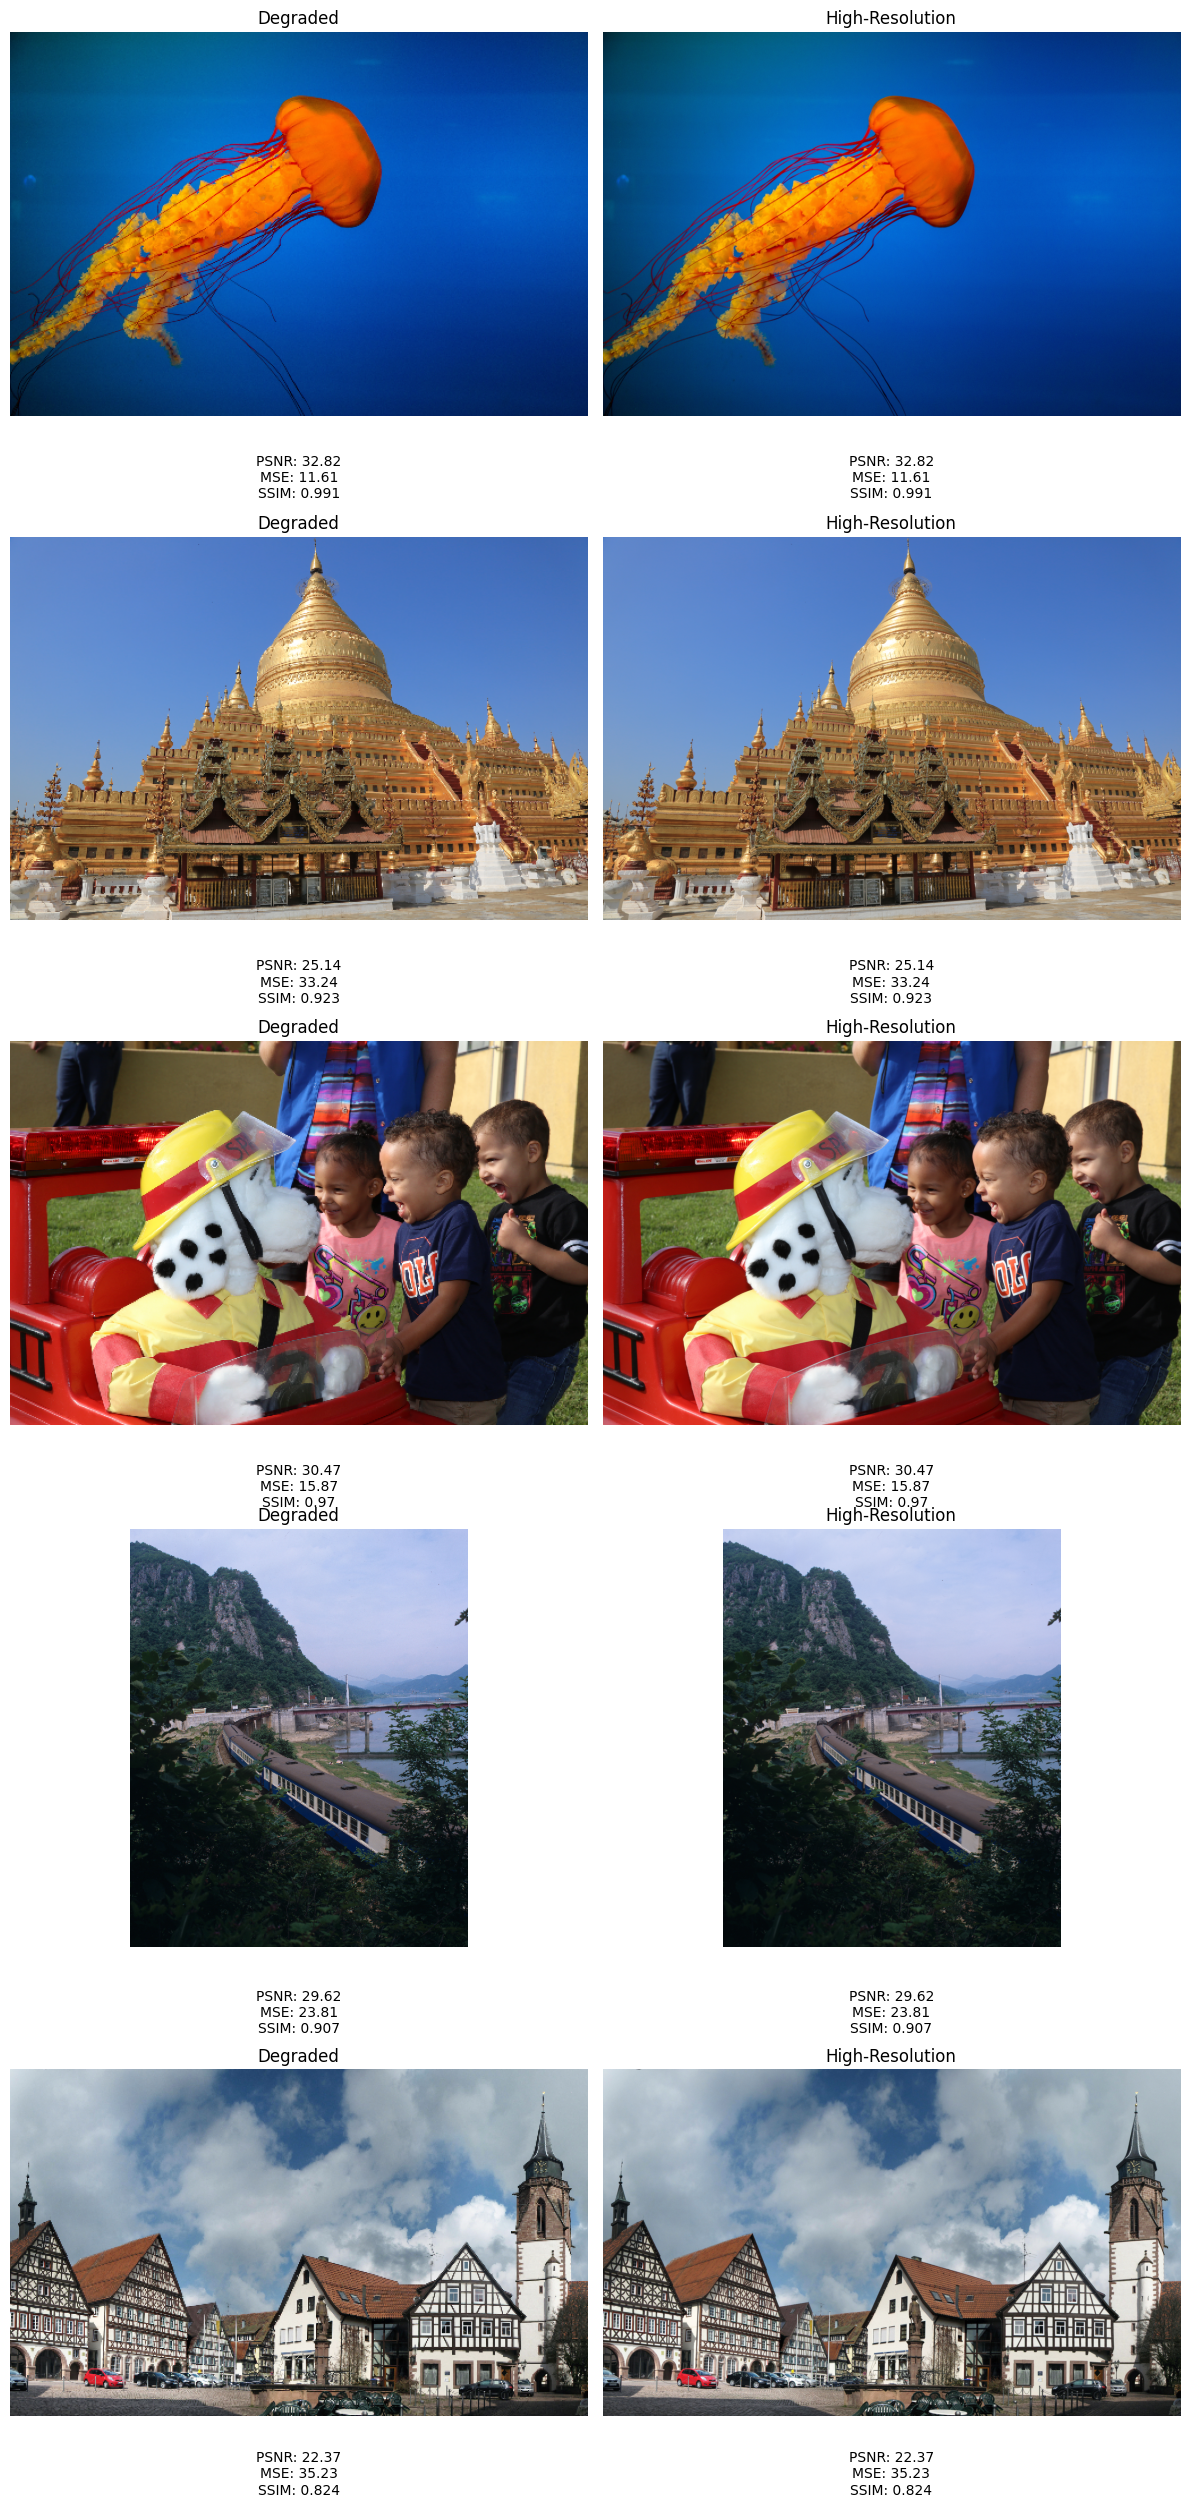

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def load_images_from_folder(folder, n_images=10):
    images = []
    filenames = sorted(os.listdir(folder))[:n_images]
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images, filenames

def downsample_image(image, factor=4):
    height, width = image.shape[:2]
    new_height, new_width = height // factor, width // factor
    return cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

def calculate_metrics(original, degraded):
    if original.shape != degraded.shape:
        degraded = cv2.resize(degraded, (original.shape[1], original.shape[0]))

    mse = np.mean((original - degraded) ** 2)
    psnr_value = psnr(original, degraded, data_range=original.max() - original.min())

    ssim_value, _ = ssim(original, degraded, multichannel=True, full=True, win_size=3)

    return round(psnr_value, 2), round(mse, 2), round(ssim_value, 3)
def display_images_with_metrics(degraded_images, high_res_images, filenames):
    n = len(degraded_images)
    fig, axes = plt.subplots(n, 2, figsize=(12, 5 * n))

    for i in range(n):
        degraded_rgb = cv2.cvtColor(degraded_images[i], cv2.COLOR_BGR2RGB)
        high_res_rgb = cv2.cvtColor(high_res_images[i], cv2.COLOR_BGR2RGB)

        psnr_value, mse, ssim_value = calculate_metrics(high_res_images[i], cv2.resize(degraded_images[i], (high_res_images[i].shape[1], high_res_images[i].shape[0])))

        axes[i, 0].imshow(degraded_rgb)
        axes[i, 0].axis('off')
        axes[i, 0].set_title("Degraded")
        axes[i, 0].text(0.5, -0.1, f"PSNR: {psnr_value}\nMSE: {mse}\nSSIM: {ssim_value}",
                        fontsize=10, ha='center', va='top', transform=axes[i, 0].transAxes)

        axes[i, 1].imshow(high_res_rgb)
        axes[i, 1].axis('off')
        axes[i, 1].set_title("High-Resolution")
        axes[i, 1].text(0.5, -0.1, f"PSNR: {psnr_value}\nMSE: {mse}\nSSIM: {ssim_value}",
                        fontsize=10, ha='center', va='top', transform=axes[i, 1].transAxes)

    plt.tight_layout()
    plt.show()

folder_path = '/content/drive/My Drive/srgan_dataset/DIV2K_train_HR/DIV2K_train_HR'

high_res_images, filenames = load_images_from_folder(folder_path, n_images=5)

degraded_images = [downsample_image(img, factor=4) for img in high_res_images]

display_images_with_metrics(degraded_images, high_res_images, filenames)
